Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

**Decision Tree Terminologies**
---------------------------------
**Root Node:** Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.

**Leaf Node: **Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.

**Splitting:** Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.

**Branch/Sub Tree:** A tree formed by splitting the tree.

**Pruning:** Pruning is the process of removing the unwanted branches from the tree.

**Parent/Child node:** The root node of the tree is called the parent node, and other nodes are called the child nodes.

**Step-1**: Begin the tree with the root node, says S, which contains the complete dataset.

**Step-2**: Find the best attribute in the dataset using Attribute Selection Measure (ASM).

**Step-3:** Divide the S into subsets that contains possible values for the best attributes.

**Step-4**: Generate the decision tree node, which contains the best attribute.

**Step-5**: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.



*IMPORTING* LIBRARIES

Setting up necessary libraries for use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix



Loading the dataset

In [2]:
from google.colab import files
raw= files.upload()


Saving bank full.csv to bank full.csv


REVIEWING DATASET:



In [51]:
rdata= pd.read_csv('bank full.csv')

In [52]:
rdata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [53]:
data=rdata.copy()

# ***`Exploratory data analysis `***


Now, I will explore the data to gain insights about the data.



In [54]:
# view dimensions of dataset
data.shape

(45211, 17)

Preview of dataset


In [55]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [56]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [57]:
data.info() #To display a brief DataFrame summary, use the 'info()' method. It␣
            #shows index and column data types, non-null values, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [58]:
data.duplicated().sum()  #to check the duplication in the instances

0

In [59]:
data.describe().T #The 'describe()' method gives statistical insights for␣
                 #numerical columns in the DataFrame: count (non-empty), mean (average), and␣
                  #more.

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


<ipython-input-60-e2eca7faf9df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data=data.corr(), annot=True, cmap='viridis')


<Axes: >

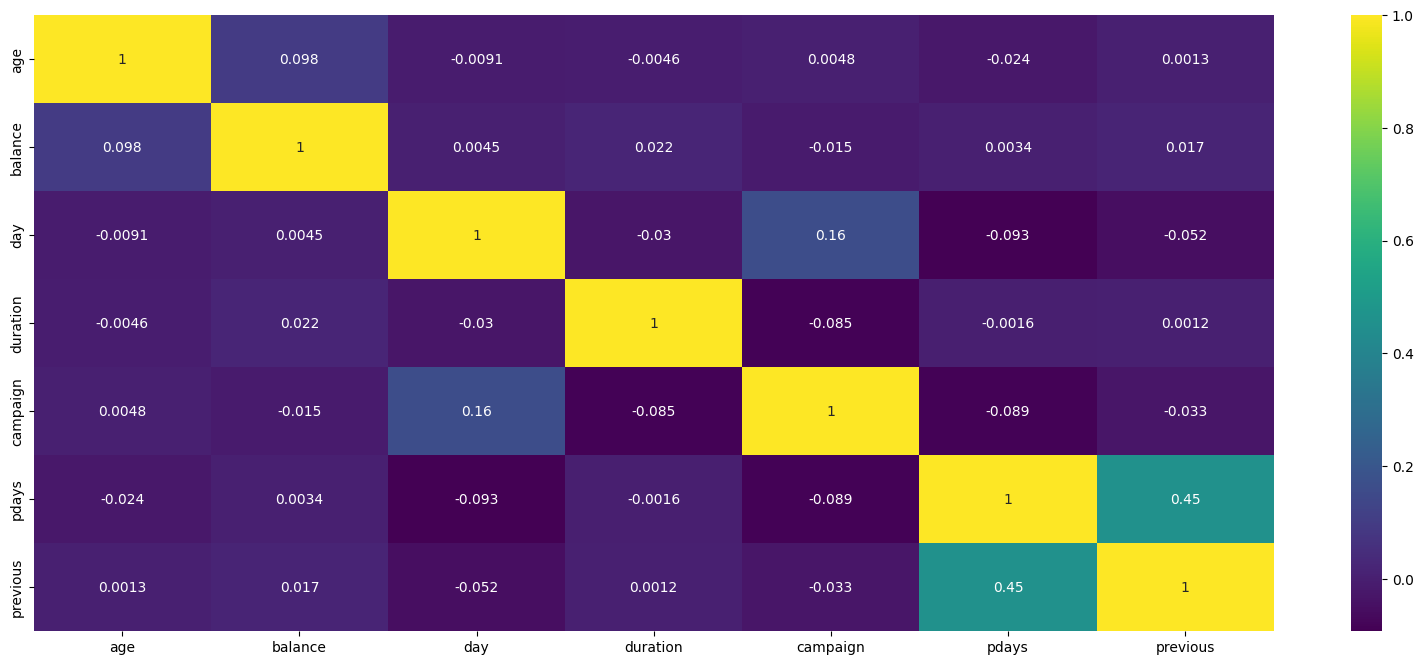

In [60]:
plt.figure(figsize=(20,8))
sb.heatmap(data=data.corr(), annot=True, cmap='viridis')

#plt.figure(figsize=(30, 8))
#sb.heatmap(data.corr() , annot = True, cmap = "Blues")

<ipython-input-61-3fb6461e9a12>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data.age, bins = 20)


<Axes: xlabel='age', ylabel='Density'>

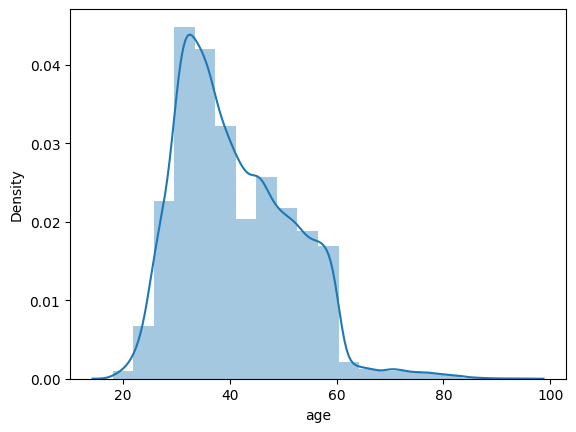

In [61]:
sb.distplot(data.age, bins = 20)

In [62]:
data.job.value_counts(dropna=False) #The 'value_counts() function tallies unique values, presenting them in
                                 #descending order, with the most common value listed first


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<Axes: xlabel='education', ylabel='count'>

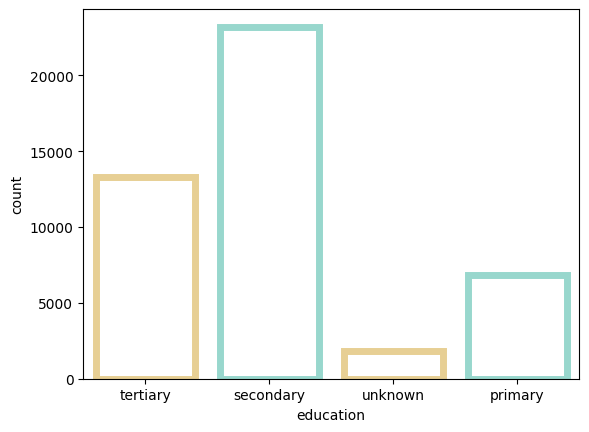

In [63]:
data.education.value_counts(dropna=False)
sb.countplot(x ='education', data = data,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sb.color_palette("BrBG", 2))

<Axes: xlabel='marital', ylabel='count'>

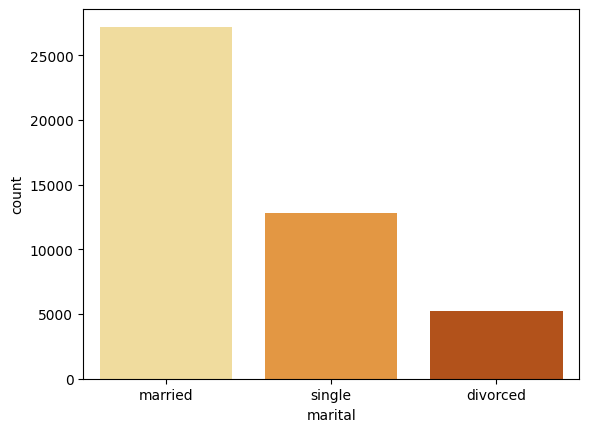

In [64]:
data.marital.value_counts(dropna=False)
sb.countplot(x="marital", data=data, palette="YlOrBr")

<Axes: xlabel='default', ylabel='count'>

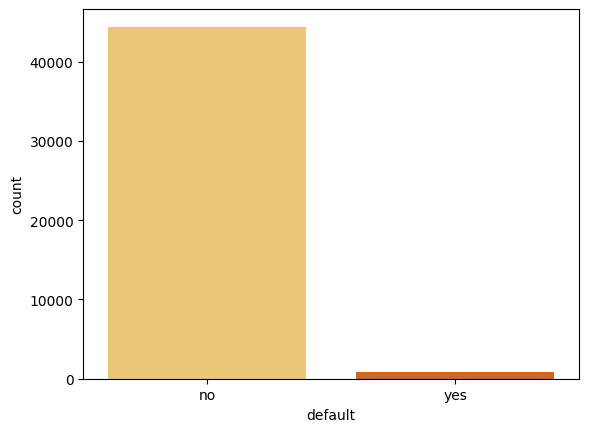

In [65]:
data.default.value_counts(dropna=False)
sb.countplot(x="default", data=data, palette="YlOrBr")

<Axes: xlabel='housing', ylabel='count'>

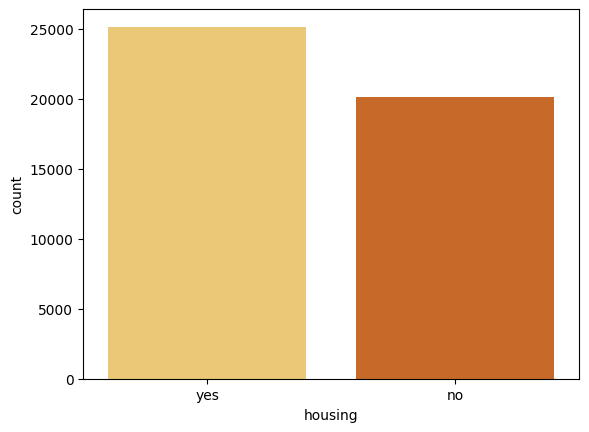

In [66]:
data.housing.value_counts(dropna=False)
sb.countplot(x="housing", data=data, palette="YlOrBr")

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


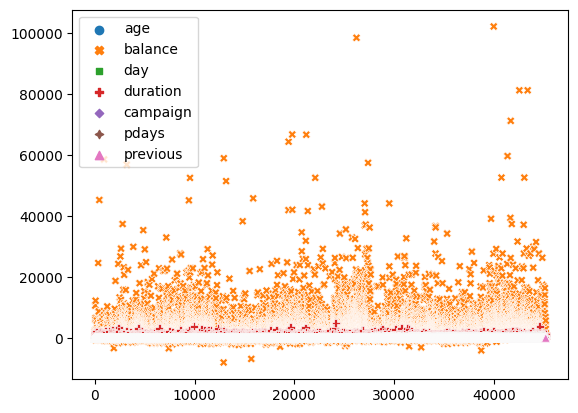

In [67]:
sb.scatterplot(data)

<Figure size 1200x900 with 0 Axes>

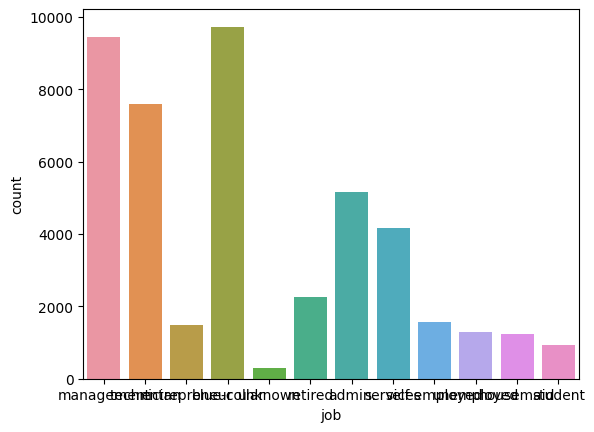

<Figure size 1200x900 with 0 Axes>

In [68]:
# Example: Distribution of the target variable
sb.countplot(x='job', data=data)
plt.figure(figsize=(12,9))

NULL VALUES:


In [69]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 DATA CLEANING:
 #Unecessary variables will be dropped in this section.




In [70]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [71]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

ORDINAL ENCODING:

Converting categorical variables for improved prediction using ML algorithms.

In [72]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder() # Simple conversion of categorical data to numerical format for analysis or ML models."
data['job']=le.fit_transform(data['job'])
data['marital']=le.fit_transform(data['marital'])
data['education']=le.fit_transform(data['education'])
data['default']=le.fit_transform(data['default'])
data['housing']=le.fit_transform(data['housing'])
data['loan']=le.fit_transform(data['loan'])
data['contact']=le.fit_transform(data['contact'])
data['month']=le.fit_transform(data['month'])
data['poutcome']=le.fit_transform(data['poutcome'])
data['y']=le.fit_transform(data['y'])

In [73]:
data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

DATA PARTITIONING:

The dataset will be divided into 80% for training and 20% for testing.


In [74]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [75]:
X.shape

(45211, 16)

In [76]:
y.shape

(45211,)

***`STANDARDIZATION`***

Standardize features by removing the mean and scaling to unit variance.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

StandardScaler is sensitive to outliers,

In [77]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(X_train)
x_test = ss.transform(X_test)


MODELS:

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
#Train
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
 y_pred_dtc = dtc.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [81]:
 score_dtc = accuracy_score(y_test, y_pred_dtc)*100
score_dtc

84.6953444653323

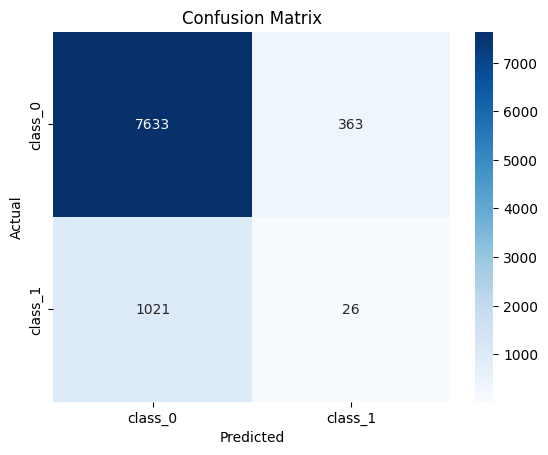

In [82]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtc)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [83]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtc))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7996
           1       0.07      0.02      0.04      1047

    accuracy                           0.85      9043
   macro avg       0.47      0.49      0.48      9043
weighted avg       0.79      0.85      0.81      9043



In [84]:
acs=accuracy_score(y_test, y_pred_dtc)*100
acs

84.6953444653323

**Advantages of the Decision Tree**
It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
It can be very useful for solving decision-related problems.
It helps to think about all the possible outcomes for a problem.
There is less requirement of data cleaning compared to other algorithms.

**Disadvantages of the Decision Tree**
The decision tree contains lots of layers, which makes it complex.
It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
For more class labels, the computational complexity of the decision tree may increase.